[link text](https://)https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html?highlight=clahe

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
import cv2

from google.colab.patches import cv2_imshow

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
import cv2
# //Reading the image And doing some preprocessing

image = cv2.imread('/content/drive/My Drive/final_dataset/covid/covid_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
image = np.float32(image)
image /= 255
coeffs = pywt.wavedec2(image,'db8' ,level = 3)
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
# arr, coeff_slices, coeff_shapes = pywt.ravel_coeffs(arr)
#print(coeffs)


In [0]:
print(arr)

print(arr.shape)

[[ 2.3859675   1.8833207   2.3333573  ...  0.0373189  -0.0404199
  -0.01104097]
 [ 2.0400784   1.7872198   1.9881262  ... -0.06345988  0.03905902
   0.02288753]
 [ 2.343339    1.85691     2.3057873  ... -0.07016214  0.03056344
  -0.02210299]
 ...
 [-0.02805099 -0.0388995   0.00919381 ...  0.00381462  0.04798859
   0.0988275 ]
 [-0.05353635  0.01588537  0.02112623 ... -0.01881634 -0.01276436
   0.03063788]
 [ 0.06556825 -0.01857675  0.00795618 ...  0.00814112 -0.00922438
   0.00855841]]
(268, 268)


In [0]:
print(len(coeff_slices))
print(len(coeff_shapes))

4
4


In [0]:
def preprocess_image(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
    cl = clahe.apply(img)
    image = Image.fromarray(cl)
    im = Image.new('RGB', image.size)
    im.paste(image)
    return im

In [0]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

cv2.imwrite('clahe_2.jpg',cl1)

Text(0.5, 1.0, 'Image Before & After CLAHE')

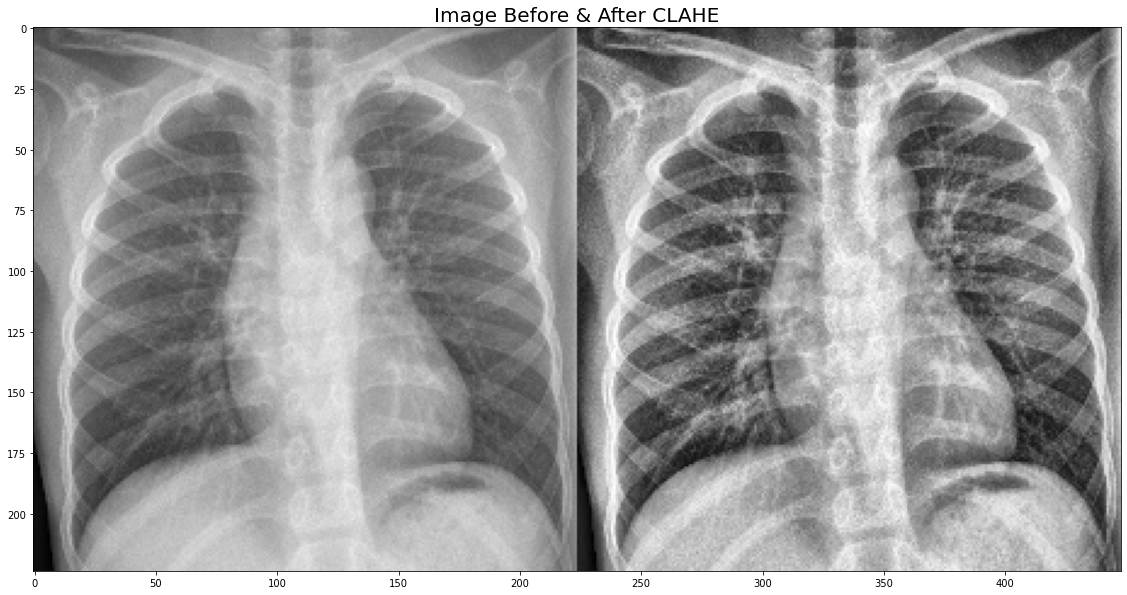

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/My Drive/final_dataset/normal/normal_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
# image = np.float32(image) 
# image /= 255
# coeffs = pywt.wavedec2(image,'db8' ,level = 3)
# arr, coeff_slices = pywt.coeffs_to_array(coeffs)
# arr.shape

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(image)
res = np.hstack((image,cl))
plt.figure(figsize=(20,10))
plt.imshow(res ,cmap ='gray')
plt.title('Image Before & After CLAHE', fontdict = {'fontsize' : 20})

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import os

imagesall = glob.glob("/content/drive/My Drive/final_dataset/covid/*")

for k in range(len(imagesall)):
 image = cv2.imread("/content/drive/My Drive/final_dataset/covid/"+"covid_{}.jpg".format(k))
 image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 image = cv2.resize(image, (224, 224))
 clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
 cl = clahe.apply(image)
 np.save(os.path.join("/content/drive/My Drive/final_dataset/CovidEnhancement","covid" +str(k)+ '_jpg') ,cl)



In [0]:
normalimagesall = glob.glob("/content/drive/My Drive/final_dataset/normal/*")

for k in range(len(normalimagesall)):
 image = cv2.imread("/content/drive/My Drive/final_dataset/normal/"+"normal_{}.jpg".format(k))
 image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 image = cv2.resize(image, (224, 224))
 clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
 cl = clahe.apply(image)
 np.save(os.path.join("/content/drive/My Drive/final_dataset/NormalEnhancement","normal" +str(k)+ '_jpg') ,cl)

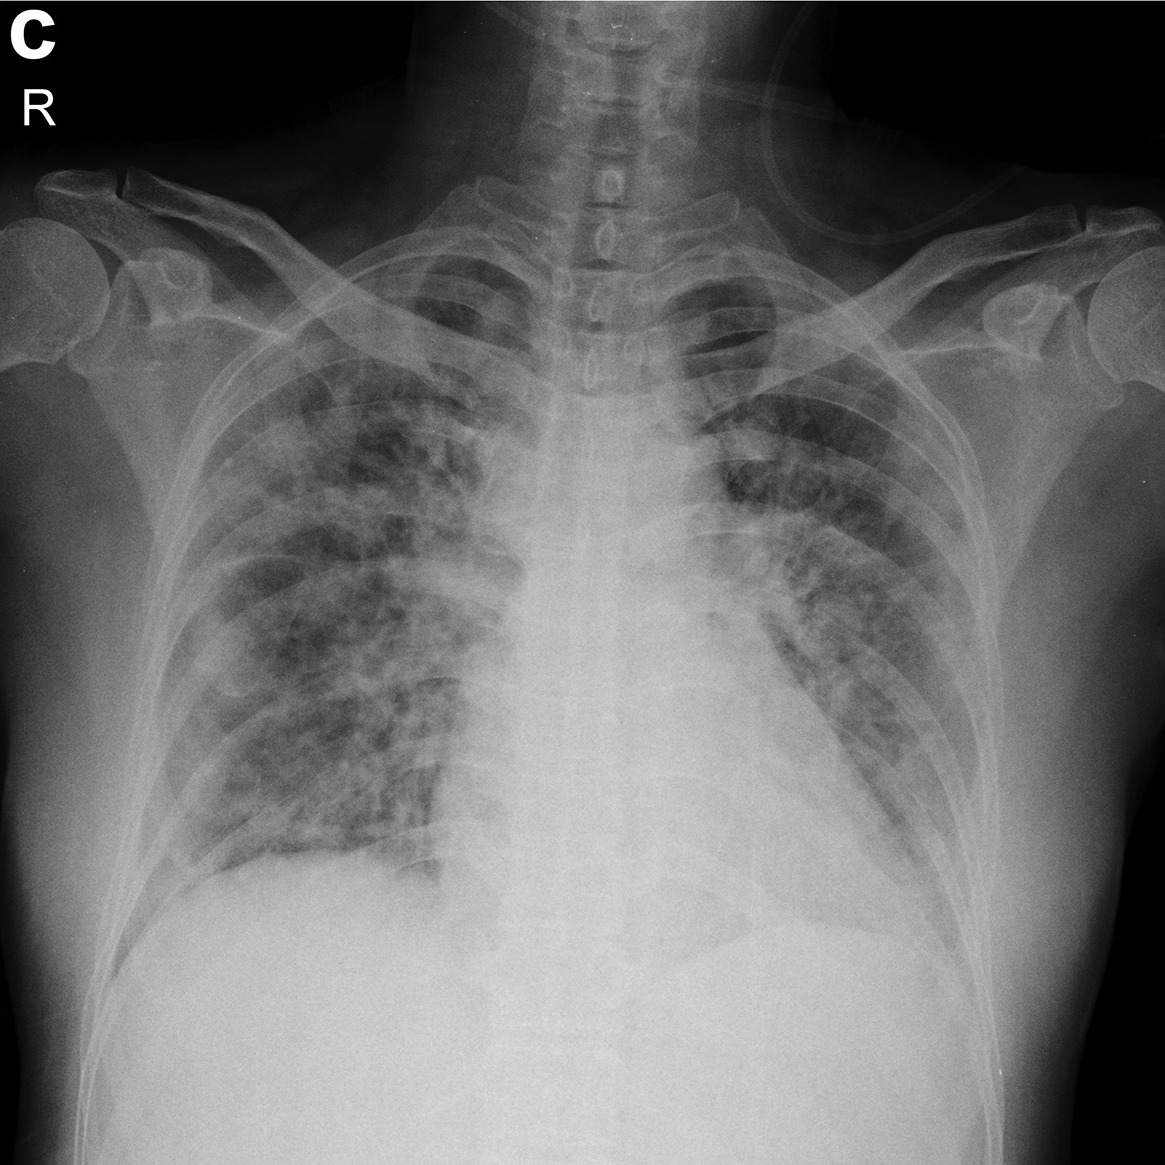

In [0]:
image = cv2.imread('/content/drive/My Drive/final_dataset/covid/covid_3.jpg')
#cv2_imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)